In [1]:
from tensorflow.keras.datasets.mnist import load_data
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from mh_vae import MHVAE

2023-05-18 19:11:06.564331: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


##  Loading Dataset...

In [2]:
(X, y), (_, _) = load_data()
X = X.reshape((len(X), -1)) / 255.

##  Loading Model...

In [6]:
model = MHVAE(input_dim=784, latent_dim=2, regularization_const=1000)
model.load_weights('vae_weights_2d.h5')

In [7]:
z, _ = model.encode(X)
print(z.shape)

(60000, 2)


##  Visualizing Latent Space...

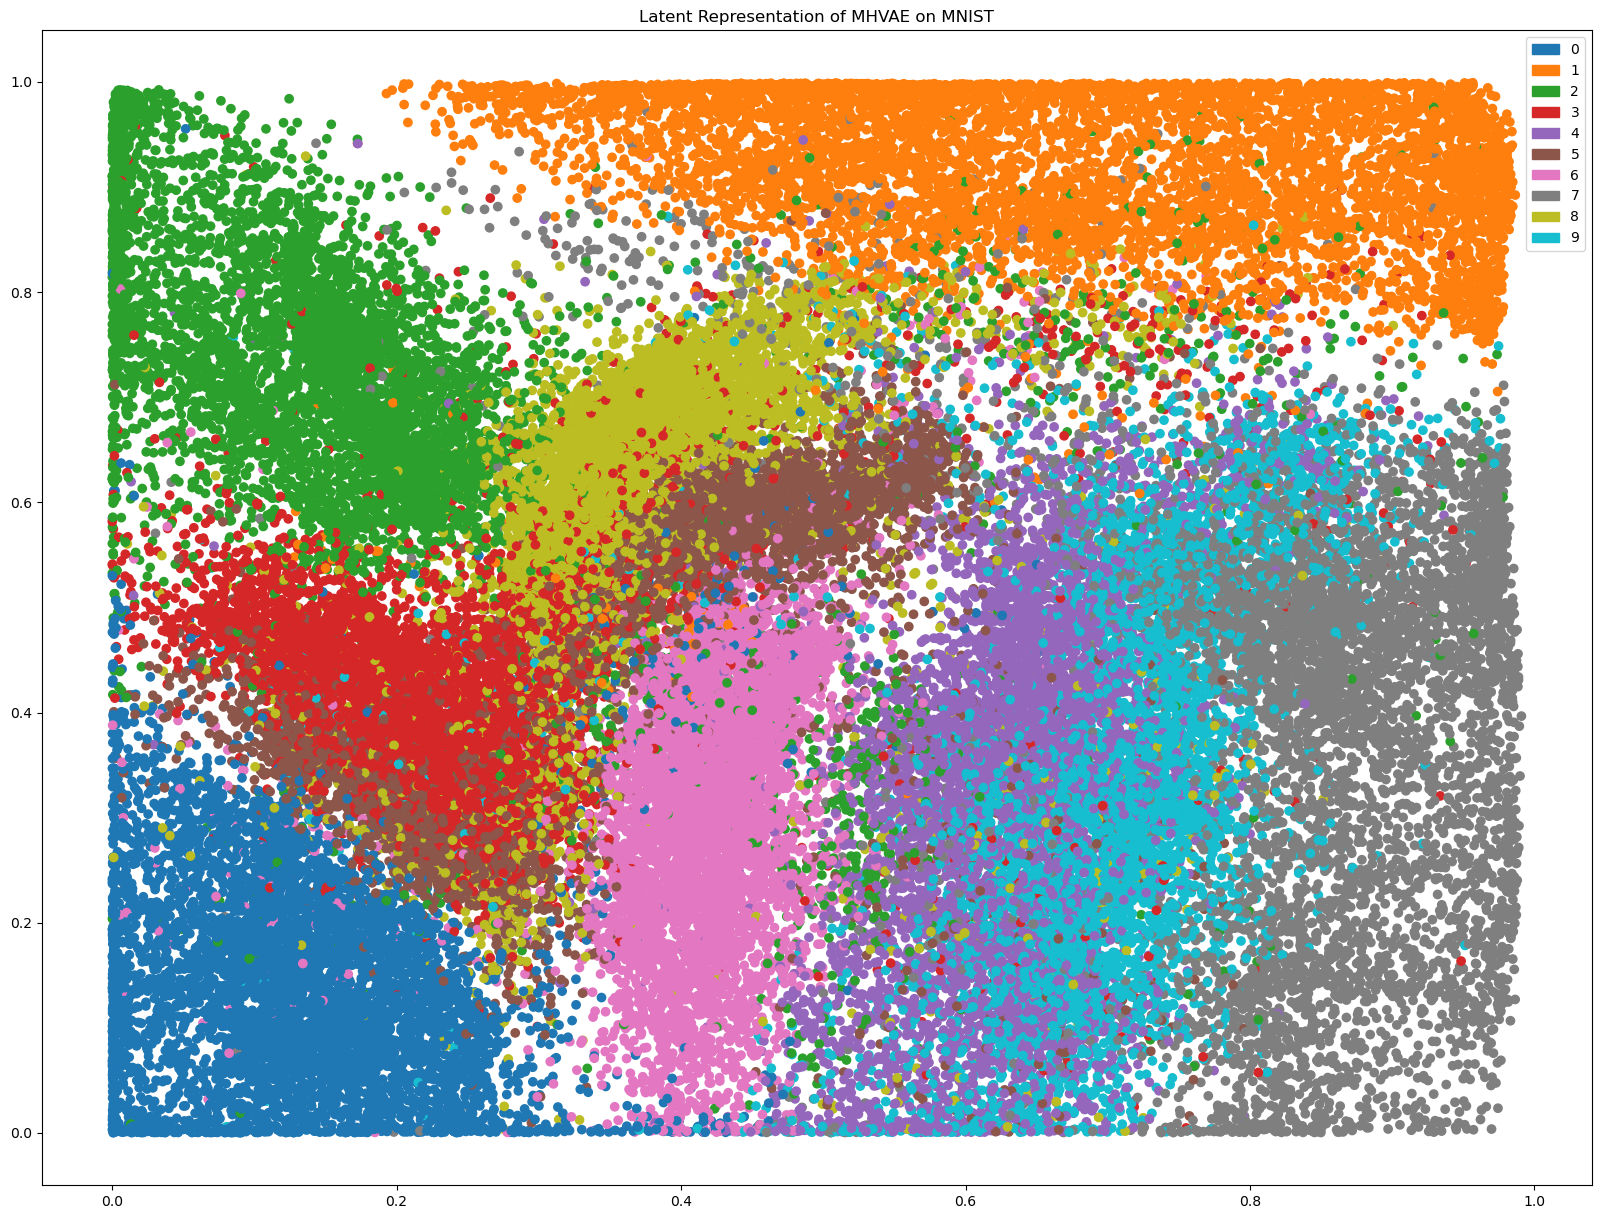

In [8]:
from matplotlib import colors as mcolors
import matplotlib.patches as mpatches

colors = list(mcolors.TABLEAU_COLORS)
patches = [mpatches.Patch(color=colors[i], label=f'{i}') for i in range(10)]

plt.figure(figsize=(20, 15))
plt.scatter(z[:, 0], z[:, 1], color=[colors[y[i]] for i in range(len(y))], marker='o', label=[str(y[i]) for i in range(len(y))])
plt.legend(handles=patches)
plt.title('Latent Representation of MHVAE on MNIST')
plt.savefig('latent.png')
plt.show()